<AxesSubplot:>

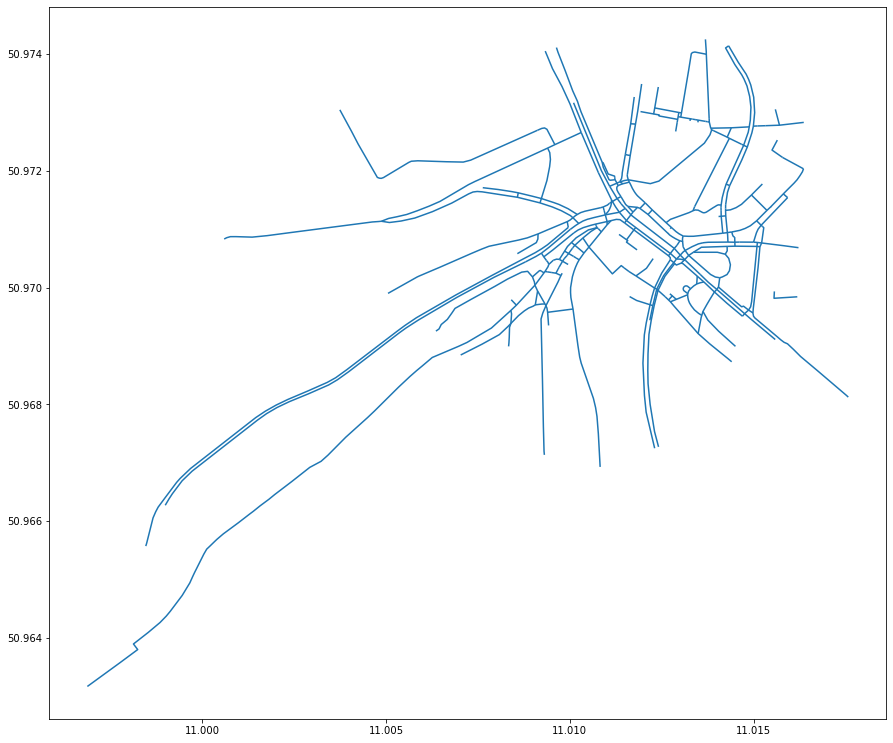

In [1]:
# WGS84 Latitude/Longitude: "EPSG:4326"
    # 
    # UTM Zones (North): "EPSG:32633"
    # 
    # UTM Zones (South): "EPSG:32733"
    
    #https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# street_map = gpd.read_file("D:\\Digital Engineering\\Courses\\Wi21-22\\Traffic data simulation\\Gothaer Platzt Model\\Infrastructure\\untitled\\Roads\\roads.shp")
file = os.listdir("data/GothaerPlatzShpFiles")
path = [os.path.join("data/GothaerPlatzShpFiles", i) for i in file if "roads-line.shp" in i]
G = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path],ignore_index=True), crs=gpd.read_file(path[0]).crs)



gothaer_platz = G

fig,ax = plt.subplots(figsize = (15,15))

gothaer_platz.plot(ax = ax)


In [2]:
from shapely.geometry import Point, Polygon
df = pd.read_csv("data/Detektordaten Erfurt.csv")
crs = {"init": "epsg:4326"}
df.head()

,Name,Nummer,Fahrstreifen,Anzahl Fahrstreifen,Richtung,Aktivierung Modell,Typ,Latitude,Longitude
0,EF_LSA_K251_D001_IS1_1,10025101,1,1,R,nein,LSA,50.971541,11.011033
1,EF_LSA_K251_D002_IS1,10025102,1,1,R,ja,LSA,50.971671,11.010909
2,EF_LSA_K251_D003_IS2,10025103,2,1,G,ja,LSA,50.971687,11.010948
3,EF_LSA_K251_D004_IS3,10025104,3,1,G,ja,LSA,50.971704,11.011001
4,EF_LSA_K251_D008_IS7,10025108,1,1,R,ja,LSA,50.971045,11.010398


In [3]:
geometry = [Point(xy) for xy in zip(df["Longitude"],df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,#specify our data
 crs = crs, # specify our coordinate system
geometry= geometry) # specify the geometry list we created
geo_df.head()

D:\program files\Anaconda\envs\Python-Anaconda-Vissim\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Name,Nummer,Fahrstreifen,Anzahl Fahrstreifen,Richtung,Aktivierung Modell,Typ,Latitude,Longitude,geometry
0,EF_LSA_K251_D001_IS1_1,10025101,1,1,R,nein,LSA,50.971541,11.011033,POINT (11.01103 50.97154)
1,EF_LSA_K251_D002_IS1,10025102,1,1,R,ja,LSA,50.971671,11.010909,POINT (11.01091 50.97167)
2,EF_LSA_K251_D003_IS2,10025103,2,1,G,ja,LSA,50.971687,11.010948,POINT (11.01095 50.97169)
3,EF_LSA_K251_D004_IS3,10025104,3,1,G,ja,LSA,50.971704,11.011001,POINT (11.01100 50.97170)
4,EF_LSA_K251_D008_IS7,10025108,1,1,R,ja,LSA,50.971045,11.010398,POINT (11.01040 50.97104)


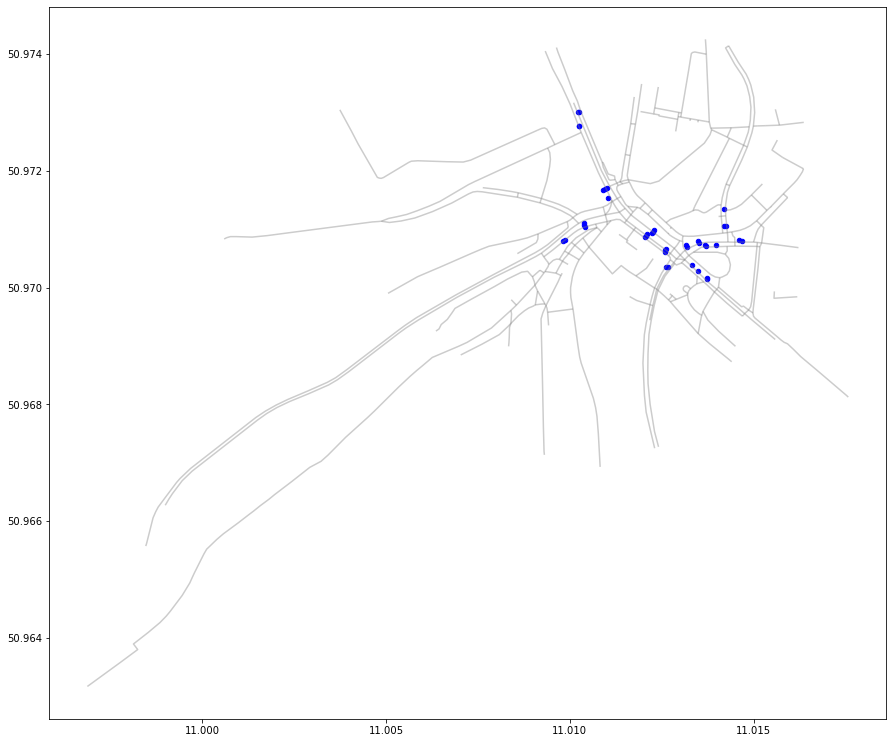

In [4]:
fig,ax = plt.subplots(figsize= (15,15))
gothaer_platz.plot(ax = ax, alpha= 0.4, color= "grey")
geo_df.plot(ax = ax, color= "blue", markersize = 20)
plt.savefig("sensors.jpg")
